# Selection and cleaning of the Data Set

This is part of Chapter 6

The statistics shown here intend to enlighten the characteristics of the data set used to contruct the ABM.

The data was provided by the PMMG, to whom we are very thankful.

The **programmer** is Eric Araujo.

The **last update** was in 12/09/2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import geopandas
import descartes
import numpy as np

import folium
import seaborn as sns

%matplotlib inline

In [2]:
xls = pd.ExcelFile('data/Lavras.xls')
registers = pd.read_excel(xls, 'OCORRENCIAS')
involved = pd.read_excel(xls, 'ENVOLVIDOS')
#materials = pd.read_excel(xls, 'MATERIAIS')

In [6]:
registers.head(2)

Ano Fato                 Bairro  \
0      2014  ANISIO ALVES DE ABREU   
1      2014  ANISIO ALVES DE ABREU   

                     Desc Longa Meio Utilizado  \
0  AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS   
1                                ARMAS DE FOGO   

                 Desc Longa Subgrupo Complemento Nat  \
0  BENS / VALORES DE ESTABELECIMENTO /PESSOA JURI...   
1  BENS / VALORES DE ESTABELECIMENTO /PESSOA JURI...   

  Descrição Longa Local Imediato Descrição Subclasse Nat Principal  \
0           POSTO DE COMBUSTIVEL                             ROUBO   
1           POSTO DE COMBUSTIVEL                             ROUBO   

  Dia da Semana Fato  Dia Numérico Fato          Faixa 1 Hora Fato   Latitude  \
0       QUARTA-FEIRA                  8  De 03:00 as 03:59         -21.254166   
1       QUARTA-FEIRA                 29  De 00:00 as 00:59         -21.254166   

   Longitude  Mês Numérico Fato Município         Número REDS  \
0 -44.999031                  1    LAVRAS  2014-000525047-001   
1 -44.999031                  1    LAVRAS  2014-002172720-001   

  Tentado/Consumado Nat Principal UNIDADE_AREA   Unidade Área Militar  \
0                         TENTADO       08 BPM  54 CIA PM/8 BPM/6 RPM   
1                       CONSUMADO       08 BPM  54 CIA PM/8 BPM/6 RPM   

   Município - Código  
0              313820  
1              313820

In [7]:
len(registers)

910

In [8]:
involved.head(2)

Número REDS                Tipo Envolvimento  Idade Aparente  Cútis  \
0  2014-000053870-001  VITIMA DE ACAO CRIMINAL / CIVEL            43.0  PARDA   
1  2014-000143918-001  VITIMA DE ACAO CRIMINAL / CIVEL            22.0  NEGRA   

       Deficiência Física Estado Civil            Grau Lesão  \
0  PREENCHIMENTO OPCIONAL       CASADO  SEM LESOES APARENTES   
1  PREENCHIMENTO OPCIONAL     SOLTEIRO  SEM LESOES APARENTES   

                                  Escolaridade      Prisão / Apreensão  \
0              ENSINO MEDIO COMPLETO (2º GRAU)  PREENCHIMENTO OPCIONAL   
1  ENSINO FUNDAMENTAL COMPLETO (8 ANOS ESTUDO)  PREENCHIMENTO OPCIONAL   

        Sexo Ocupação Atual Nacionalidade  
0  MASCULINO            NaN    BRASILEIRA  
1  MASCULINO            NaN    BRASILEIRA

## Structuring and selecting data for registers

In [9]:
# Renaming registers columns
translate_cols = {'Ano Fato': 'year',
                  'Mês Numérico Fato': 'month',
                  'Dia Numérico Fato': 'day',
                  'Dia da Semana Fato': 'week_day',
                  'Bairro': 'neighborhood',
                  'Desc Longa Meio Utilizado': 'violence_type',
                  'Desc Longa Subgrupo Complemento Nat': 'type_object_robbed',
                  'Descrição Longa Local Imediato': 'location_description',
                  'Descrição Subclasse Nat Principal': 'crime_type',
                  'Faixa 1 Hora Fato': 'one_h_window',
                  'Latitude': 'lat',
                  'Longitude': 'lon',
                  'Município': 'city',
                  'Número REDS': 'reds',
                  'Tentado/Consumado Nat Principal': 'committed',
                  'UNIDADE_AREA': 'pm_area',
                  'Unidade Área Militar': 'pm_unity', 
                  'Município - Código': 'city_code'
                 }
registers.rename(columns=translate_cols, inplace=True)

# Removing irrelevant columns for registers
registers = registers[['year', 'neighborhood', 'violence_type', 'type_object_robbed',
       'location_description', 'crime_type', 'week_day', 'day',
       'one_h_window', 'lat', 'lon', 'month', 'city', 'reds', 'committed',
       ]]

# Selecting data from the years (2014-2018)
registers = registers[registers.year.isin([2014,2015,2016,2017,2018])]

# Removing white spaces in one_h_window column
registers.one_h_window = registers.one_h_window.str.rstrip()


# Changing time windows
one_h_replacement_dict = {   'De 00:00 as 00:59': '00:00 - 00:59',
                             'De 01:00 as 01:59': '01:00 - 01:59',
                             'De 02:00 as 02:59': '02:00 - 02:59',
                             'De 03:00 as 03:59': '03:00 - 03:59',
                             'De 04:00 as 04:59': '04:00 - 04:59',
                             'De 05:00 as 05:59': '05:00 - 05:59',
                             'De 06:00 as 06:59': '06:00 - 06:59',
                             'De 07:00 as 07:59': '07:00 - 07:59',
                             'De 08:00 as 08:59': '08:00 - 08:59',
                             'De 09:00 as 09:59': '09:00 - 09:59',
                             'De 10:00 as 10:59': '10:00 - 10:59',
                             'De 11:00 as 11:59': '11:00 - 11:59',
                             'De 12:00 as 12:59': '12:00 - 12:59',
                             'De 13:00 as 13:59': '13:00 - 13:59',
                             'De 14:00 as 14:59': '14:00 - 14:59',
                             'De 15:00 as 15:59': '15:00 - 15:59',
                             'De 16:00 as 16:59': '16:00 - 16:59',
                             'De 17:00 as 17:59': '17:00 - 17:59',
                             'De 18:00 as 18:59': '18:00 - 18:59',
                             'De 19:00 as 19:59': '19:00 - 19:59',
                             'De 20:00 as 20:59': '20:00 - 20:59',
                             'De 21:00 as 21:59': '21:00 - 21:59',
                             'De 22:00 as 22:59': '22:00 - 22:59',
                             'De 23:00 as 23:59': '23:00 - 23:59'}

registers.one_h_window.replace(one_h_replacement_dict, inplace=True)

# Input NaN to missing values in the data set
missing_values = ['INVÁLIDO', 'ESCOLARIDADE - IGNORADA', 'IGNORADA', 'PREENCHIMENTO OPCIONAL', 'INVALIDO', 
                  'ESTADO CIVIL - IGNORADO', 'ESTADO CIVIL - NAO DECLARADO', 'PREENCHIMENTO OPCIONAL', 
                  'GRAU DA LESAO - IGNORADO' ]
registers.replace(to_replace=missing_values, value=np.nan, inplace=True)

In [11]:
# No duplicates
print('Number of registers in the file: \t', len(registers))
print('Number of unique REDS - IDs: \t\t', len(set(registers.reds)))

Number of registers in the file: 	 862
Number of unique REDS - IDs: 		 862


Text(0.5, 1, 'Missing Data')

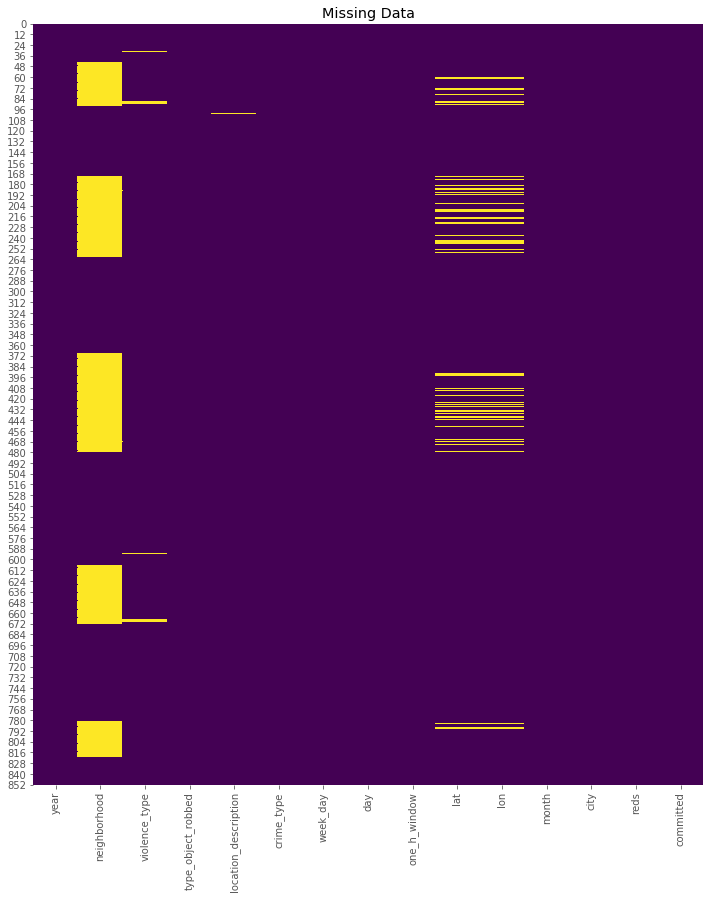

In [12]:
plt.figure(figsize=(12,14))
sns.heatmap(registers.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data')

In [13]:
miss_amount = len(registers[(pd.isna(registers.lat)) | (pd.isna(registers.lon))])
print('Registers without lat or lon: \t', miss_amount)
print('Total registers: \t\t', len(registers))
print('Percentage of missing data: \t', miss_amount*100/len(registers), '%')

Registers without lat or lon: 	 59
Total registers: 		 862
Percentage of missing data: 	 6.844547563805104 %


In [14]:
registers.dropna(axis=0, subset=['lat', 'lon'], inplace=True)
len(registers)

803

In [10]:
# Location description
pd.value_counts(registers.location_description)[:10]

VIA DE ACESSO PUBLICA                              407
POSTO DE COMBUSTIVEL                               113
BAR / LANCHONETE / RESTAURANTE / SIMILAR            62
OUTROS - ESTABELECIMENTOS COMERCIAIS / SERVICOS     29
CASA                                                29
MERCEARIA / SACOLAO / SUPERMERCADO                  27
CONFEITARIA / PADARIA / PANIFICADORA                24
LOJA DIVERSA                                        16
SITIO                                               12
BOATE / CASA DE SHOW / SIMILAR                      11
Name: location_description, dtype: int64

In [11]:
407/803

0.5068493150684932

In [12]:
# Select crimes on the streets and reset index
registers_streets = registers[registers.location_description=='VIA DE ACESSO PUBLICA']
registers_streets.reset_index(drop=True, inplace=True)

In [13]:
location_comparison_df = pd.DataFrame([registers.year.value_counts().sort_index(ascending=False), 
                                      registers_streets.year.value_counts().sort_index(ascending=False)], 
                                      index=['Total', 'Streets']).T

In [14]:
location_comparison_df

Total  Streets
2018    121       66
2017    187      101
2016    221      104
2015    161       77
2014    113       59

In [15]:
location_comparison_df.sum()

Total      803
Streets    407
dtype: int64

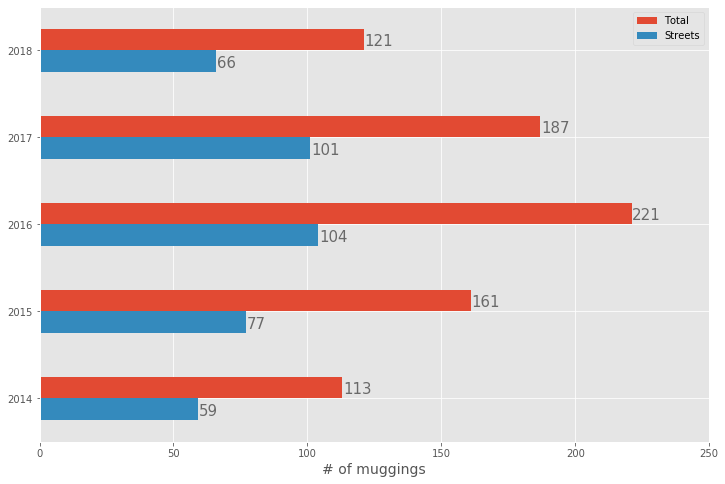

In [16]:
# Crimes per year
ax = location_comparison_df.plot(kind='barh', figsize=((12,8)))

ax.set_alpha(0.8)
#plt.title('Robberies per year in Lavras (2014-2018)', fontsize=18)
plt.xlabel('# of muggings', fontsize=14)
plt.xlim(0,250)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    #print(totals)
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.2, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

## Selecting data within map limits

lower_x = -45.0059971

higher_x = -44.9870231

lower_y = -21.2479824

higher_y = -21.2360275

In [17]:
# Limits for lat and lon
# x
lower_lon = -45.0059971
higher_lon = -44.9870231
# y
lower_lat = -21.2479824
higher_lat = -21.2360275

In [18]:
# Selecting registers based on GIS limits
reg_streets_gis = registers_streets[(registers_streets.lat >= lower_lat) & (registers_streets.lat <= higher_lat) &
                                    (registers_streets.lon >= lower_lon) & (registers_streets.lon <= higher_lon)]
print('Registers of muggings in the streets within GIS limist: ', len(reg_streets_gis))

Registers of muggings in the streets within GIS limist:  113


In [19]:
mugggings_comparison_df = pd.DataFrame([registers.year.value_counts().sort_index(ascending=False), 
                                      registers_streets.year.value_counts().sort_index(ascending=False),
                                      reg_streets_gis.year.value_counts().sort_index(ascending=False)], 
                                      index=['Total', 'Streets', 'Streets + GIS limits']).T

In [20]:
mugggings_comparison_df

Total  Streets  Streets + GIS limits
2018    121       66                    14
2017    187      101                    26
2016    221      104                    31
2015    161       77                    22
2014    113       59                    20

In [21]:
mugggings_comparison_df.sum()

Total                   803
Streets                 407
Streets + GIS limits    113
dtype: int64

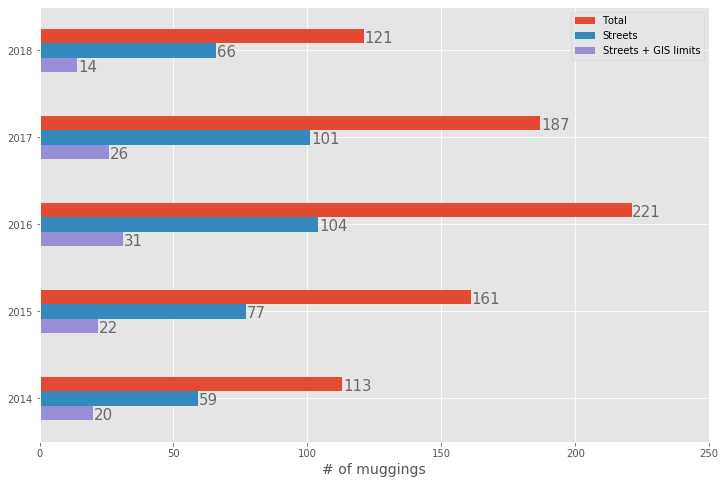

In [22]:
# Crimes per year
ax = mugggings_comparison_df.plot(kind='barh', figsize=((12,8)))

ax.set_alpha(0.8)
#plt.title('Robberies per year in Lavras (2014-2018)', fontsize=18)
plt.xlabel('# of muggings', fontsize=14)
plt.xlim(0,250)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    #print(totals)
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.16, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

In [23]:
reg_streets_gis.reset_index(drop=True, inplace=True)
reg_streets_gis.head(2)

year neighborhood                                violence_type  \
0  2014       CENTRO  AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS   
1  2014       CENTRO  AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS   

             type_object_robbed   location_description crime_type week_day  \
0  BENS / VALORES DE TRANSEUNTE  VIA DE ACESSO PUBLICA      ROUBO  DOMINGO   
1  BENS / VALORES DE TRANSEUNTE  VIA DE ACESSO PUBLICA      ROUBO   SÁBADO   

   day   one_h_window        lat        lon  month    city  \
0   29  22:00 - 22:59 -21.241168 -44.998860      6  LAVRAS   
1    4  02:00 - 02:59 -21.246095 -45.000668      1  LAVRAS   

                 reds  committed  
0  2014-013823194-001    TENTADO  
1  2014-000231361-001  CONSUMADO

In [24]:
reg_time_df = pd.DataFrame([registers.one_h_window.value_counts().sort_index(),
              registers_streets.one_h_window.value_counts().sort_index(),
              reg_streets_gis.one_h_window.value_counts().sort_index()],
             index=['Total', 'Streets', 'Streets + GIS']
            ).T.fillna(0)

Text(0, 0.5, '# of muggings')

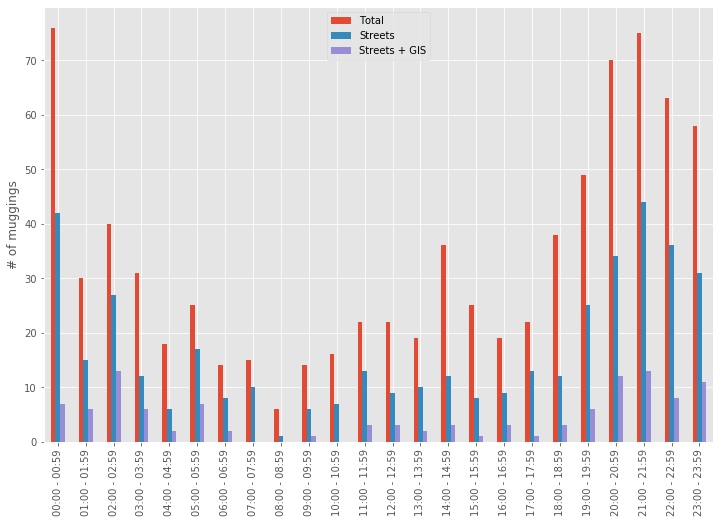

In [25]:
ax = reg_time_df.plot(kind='bar', figsize=((12,8)))
#ax.set_xlabel('Time of the day')
ax.set_ylabel('# of muggings')

In [26]:
reg_time_df['Total (%)'] = reg_time_df['Total']*100 / sum(reg_time_df['Total'])
reg_time_df['Streets (%)'] = reg_time_df['Streets']*100 / sum(reg_time_df['Streets'])
reg_time_df['Streets + GIS (%)'] = reg_time_df['Streets + GIS']*100 / sum(reg_time_df['Streets + GIS'])

In [27]:
reg_time_df

Total  Streets  Streets + GIS  Total (%)  Streets (%)  \
00:00 - 00:59   76.0     42.0            7.0   9.464508    10.319410   
01:00 - 01:59   30.0     15.0            6.0   3.735990     3.685504   
02:00 - 02:59   40.0     27.0           13.0   4.981320     6.633907   
03:00 - 03:59   31.0     12.0            6.0   3.860523     2.948403   
04:00 - 04:59   18.0      6.0            2.0   2.241594     1.474201   
05:00 - 05:59   25.0     17.0            7.0   3.113325     4.176904   
06:00 - 06:59   14.0      8.0            2.0   1.743462     1.965602   
07:00 - 07:59   15.0     10.0            0.0   1.867995     2.457002   
08:00 - 08:59    6.0      1.0            0.0   0.747198     0.245700   
09:00 - 09:59   14.0      6.0            1.0   1.743462     1.474201   
10:00 - 10:59   16.0      7.0            0.0   1.992528     1.719902   
11:00 - 11:59   22.0     13.0            3.0   2.739726     3.194103   
12:00 - 12:59   22.0      9.0            3.0   2.739726     2.211302   
13:00 - 13:59   19.0     10.0            2.0   2.366127     2.457002   
14:00 - 14:59   36.0     12.0            3.0   4.483188     2.948403   
15:00 - 15:59   25.0      8.0            1.0   3.113325     1.965602   
16:00 - 16:59   19.0      9.0            3.0   2.366127     2.211302   
17:00 - 17:59   22.0     13.0            1.0   2.739726     3.194103   
18:00 - 18:59   38.0     12.0            3.0   4.732254     2.948403   
19:00 - 19:59   49.0     25.0            6.0   6.102117     6.142506   
20:00 - 20:59   70.0     34.0           12.0   8.717310     8.353808   
21:00 - 21:59   75.0     44.0           13.0   9.339975    10.810811   
22:00 - 22:59   63.0     36.0            8.0   7.845579     8.845209   
23:00 - 23:59   58.0     31.0           11.0   7.222914     7.616708   

               Streets + GIS (%)  
00:00 - 00:59           6.194690  
01:00 - 01:59           5.309735  
02:00 - 02:59          11.504425  
03:00 - 03:59           5.309735  
04:00 - 04:59           1.769912  
05:00 - 05:59           6.194690  
06:00 - 06:59           1.769912  
07:00 - 07:59           0.000000  
08:00 - 08:59           0.000000  
09:00 - 09:59           0.884956  
10:00 - 10:59           0.000000  
11:00 - 11:59           2.654867  
12:00 - 12:59           2.654867  
13:00 - 13:59           1.769912  
14:00 - 14:59           2.654867  
15:00 - 15:59           0.884956  
16:00 - 16:59           2.654867  
17:00 - 17:59           0.884956  
18:00 - 18:59           2.654867  
19:00 - 19:59           5.309735  
20:00 - 20:59          10.619469  
21:00 - 21:59          11.504425  
22:00 - 22:59           7.079646  
23:00 - 23:59           9.734513

Text(0, 0.5, '% of muggings')

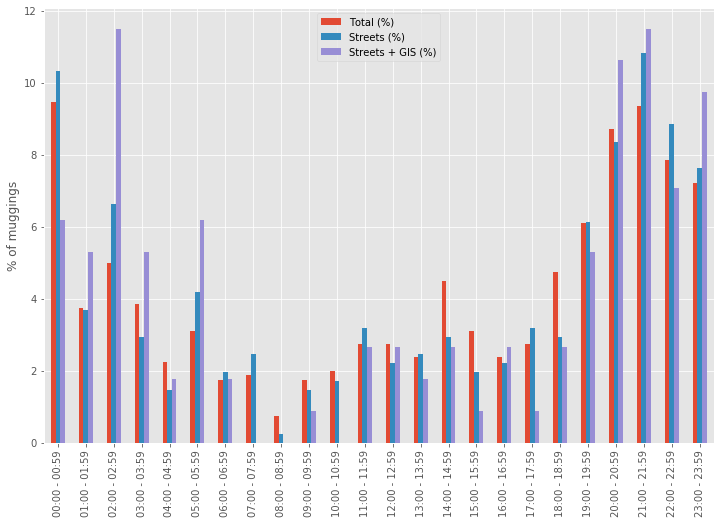

In [28]:
ax = reg_time_df[['Total (%)', 'Streets (%)', 'Streets + GIS (%)']].plot(kind='bar', figsize=((12,8)))
#ax.set_xlabel('Time of the day')
ax.set_ylabel('% of muggings')

Text(0, 0.5, '# of muggings')

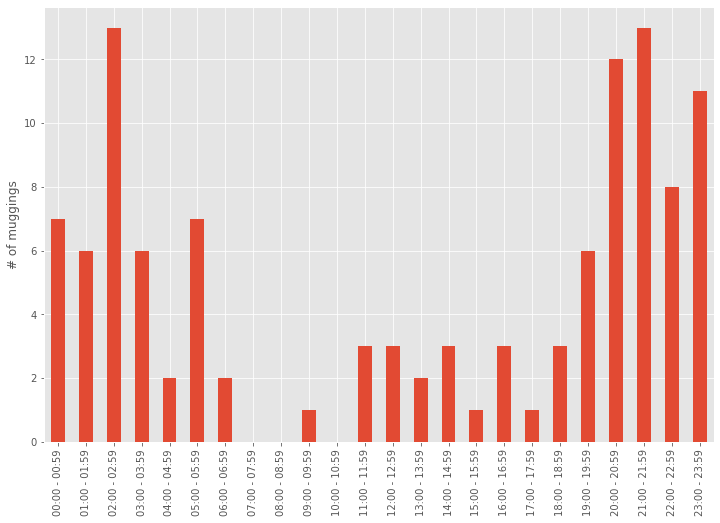

In [29]:
ax = reg_time_df['Streets + GIS'].plot(kind='bar', figsize=((12,8)))
#ax.set_xlabel('Time of the day')
ax.set_ylabel('# of muggings')

In [30]:
time_hist = pd.Series(reg_time_df['Streets + GIS'])
#time_hist['Label'] = reg_time_df.index
time_hist.reset_index(inplace=True, drop=True)

In [31]:
time_hist_2h = pd.Series([time_hist[i]+time_hist[i+1] for i in np.arange(0, 23, 2)], 
                         index=['00:00-01:59', '02:00-03:59', '04:00-05:59', '06:00-07:59', '08:00-09:59', 
                                '10:00-11:59', '12:00-13:59', '14:00-15:59', '16:00-17:59', '18:00-19:59', 
                                '20:00-21:59', '22:00-23:59'])

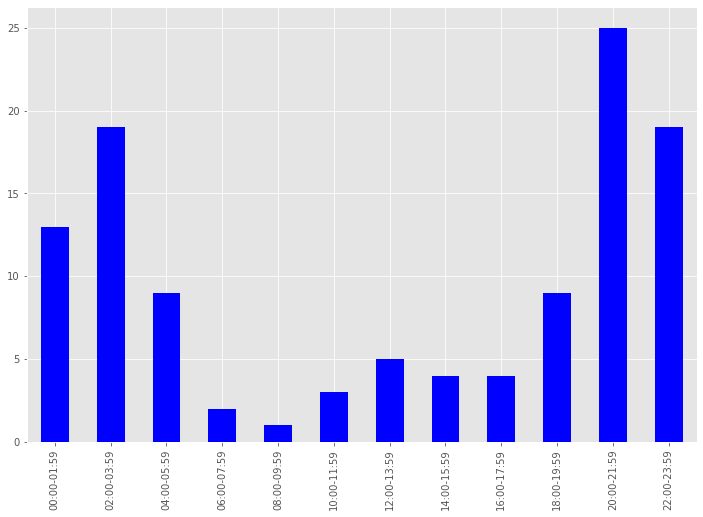

In [32]:
time_hist_2h.plot(kind='bar', figsize=((12,8)), color='blue', )

In [33]:
# Array used in the netlogo code for the variable 
# crime-rates-per-hour [13, 13, 19, 19, 9, 9, 2, 2, 1, 1, 3, 3, 5, 5, 4, 4, 4, 4, 9, 9, 25, 25, 19, 19]
list(time_hist_2h/sum(time_hist_2h))

[0.11504424778761062,
 0.168141592920354,
 0.07964601769911504,
 0.017699115044247787,
 0.008849557522123894,
 0.02654867256637168,
 0.04424778761061947,
 0.035398230088495575,
 0.035398230088495575,
 0.07964601769911504,
 0.22123893805309736,
 0.168141592920354]

In [34]:
sum(time_hist_2h)

113.0

In [37]:
sum(reg_time_df['Streets + GIS'])

113.0

In [38]:
reg_time_df['Streets + GIS']

0      7.0
1      6.0
2     13.0
3      6.0
4      2.0
5      7.0
6      2.0
7      0.0
8      0.0
9      1.0
10     0.0
11     3.0
12     3.0
13     2.0
14     3.0
15     1.0
16     3.0
17     1.0
18     3.0
19     6.0
20    12.0
21    13.0
22     8.0
23    11.0
Name: Streets + GIS, dtype: float64